# 🚪 Monty Hall — simulação e interpretação

## Nome: Morsinaldo de Azevedo Medeiros

**Enunciado (versão clássica):**  
Há 3 portas. Atrás de uma delas há um **carro**; atrás das outras, **bodes**.  
1. Você escolhe uma porta.  
2. O anfitrião, que **sabe onde está o carro**, abre **uma porta com bode** entre as duas que você não escolheu.  
3. Ele oferece a opção de **trocar** para a outra porta que ficou fechada.

**Pergunta:** é melhor **manter** a escolha inicial ou **trocar**?

**Hipóteses do modelo:**  
- O carro é colocado aleatoriamente.  
- O jogador escolhe uma porta ao acaso.  
- O anfitrião **sempre** abre uma porta com bode e nunca abre a porta escolhida.  
- Se houver duas opções possíveis, o anfitrião escolhe uma delas ao acaso.  

In [1]:
# Importações
import random
import pandas as pd
import matplotlib.pyplot as plt

## 🎯 Função de simulação

A função `simular` executa **n** rodadas independentes e conta quantas vitórias obteríamos:
- se **mantivéssemos** sempre a escolha inicial;
- se **trocássemos** sempre de porta.

Ela retorna tanto as **probabilidades estimadas** quanto os **contadores** de vitórias.

Para cada rodada:
1. Iniciamos as 3 portas com bodes.
2. Colocamos o carro aleatoriamente.
3. O jogador escolhe uma porta ao acaso.
4. O anfitrião abre uma porta com bode entre as que sobraram.
5. Verificamos se o jogador ganharia mantendo ou trocando a escolha inicial.
6. Atualizamos os contadores de vitórias.

In [ ]:
def simular(n=10_000_000, seed=7):
    rng = random.Random(seed)
    v_manter = 0
    v_trocar = 0
    for _ in range(n):
        portas = ["bode", "bode", "bode"] # 1. Iniciamos as 3 portas com bodes
        premio = rng.randrange(3)        # 2. Colocamos o carro aleatoriamente.
        portas[premio] = "carro"

        escolha = rng.randrange(3)       # 3. O jogador escolhe uma porta ao acaso.

        # 4. O anfitrião abre uma porta com bode que não é a escolhida
        candidatos = [i for i in range(3) if i != escolha and portas[i] == "bode"]
        aberta = rng.choice(candidatos)
        
        # 5. Verificamos se o jogador ganharia mantendo ou trocando a escolha inicial.
        alternativas = [i for i in range(3) if i not in (escolha, aberta)]
        trocar_para = alternativas[0]
        
        # 6. Atualizamos os contadores de vitórias.
        if escolha == premio:
            v_manter += 1
        if trocar_para == premio:
            v_trocar += 1

    return v_manter/n, v_trocar/n, v_manter, v_trocar

## 🧮 Resultados da simulação

- Executamos `simular` com muitas rodadas (ex.: 10 milhões).  
- Organizamos uma tabela com o número de vitórias e a probabilidade estimada de cada estratégia.

In [5]:
p_manter, p_trocar, v_m, v_t = simular(n=10_000_000, seed=7)

df_res = pd.DataFrame([
    {"Estratégia": "Manter", "Vitórias": v_m, "Probabilidade ~": round(p_manter, 4)},
    {"Estratégia": "Trocar", "Vitórias": v_t, "Probabilidade ~": round(p_trocar, 4)},
])
df_res

,Estratégia,Vitórias,Probabilidade ~
0,Manter,3334504,0.3335
1,Trocar,6665496,0.6665


## 📊 Visualização

Gráfico de barras comparando as probabilidades de vitória estimadas para as duas estratégias.

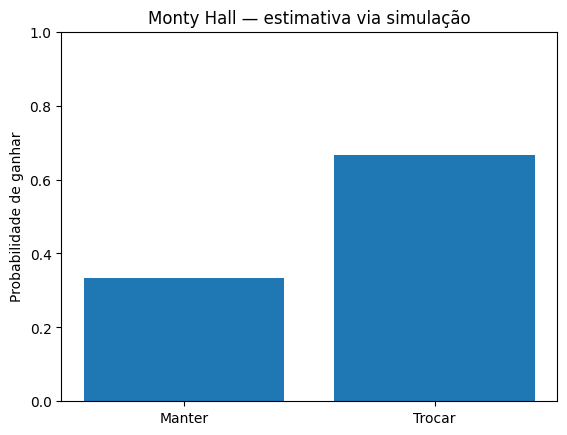

In [6]:
plt.figure()
plt.bar(df_res["Estratégia"], df_res["Probabilidade ~"])
plt.ylim(0, 1)
plt.title("Monty Hall — estimativa via simulação")
plt.ylabel("Probabilidade de ganhar")
plt.show()

## ✅ Interpretação

- A estratégia **manter** vence em ~**1/3** das rodadas.  
- A estratégia **trocar** vence em ~**2/3** das rodadas.  

**Explicação curta:**  
- A probabilidade de você **acertar de primeira** (e ganhar mantendo) é \(1/3\).  
- A probabilidade de você **errar de primeira** é \(2/3\); nesse caso, quando o anfitrião abre uma porta com bode, a outra porta fechada necessariamente tem o carro.  
- Portanto, **trocar** é a melhor estratégia: dobra sua chance de ganhar.